# Manipulating and Cleaning Data

* Real-world data is messy!
* You'll likely need to combine several data sources to get the data you actually want
  * Data from those sources will be incomplete
  * ...and it will likely not be formatted in exactly the way you want 
* ~ 80% of a Data Scientist's time is spent manipulating and cleaning data
  * "Data Wrangling"
* Python is commonly used for data wrangling (and really, all aspects of Data Science)

## __`pandas`__ (https://pandas.pydata.org/)
* de facto data wrangling tool for Python
* adds two new useful datatypes
  * __`Series`__
    * like a Python list but with editable indices for each element
  * __`DataFrame__`
    * 2-D, like an Excel spreadsheet

## Exploring `DataFrame` Information

> **Learning goal:** Be able to obtain general information about data stored in DataFrames

* If the data in your __`DataFrame`__ has 60,000 rows and 400 columns, how do you even begin to get a sense of what you're working with?
* __`pandas`__ provides convenient tools
* in order to explore __`pandas`__, we'll import __`scikit-learn`__ (a popular machine learning library) and use a well-known dataset–the **Iris** data set
  * Ronald Fisher, 1936
  * ["The use of multiple measurements in taxonomic problems"](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1469-1809.1936.tb02137.x)

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

### __`DataFrame.info`__
* let's take a look at this dataset

In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### __`DataFrame.head`__
* let's see the first few rows

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Exercise

* by default, __`DataFrame.head`__ returns the first five rows of a __`DataFrame`__
* in the code cell below, can you figure out how to get it to show more...?

In [4]:
# Hint: Consult the documentation by using iris_df.head?

### `DataFrame.tail`
* __`DataFrame.tail`__ returns the last five rows of a __`DataFrame`__

In [6]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


> **Note:** In practice, it is useful to be able to easily examine the first few or last few rows, particularly when looking for outliers in ordered datasets.`

> **Takeaway:** Just by looking at the metadata of a DataFrame or the first and last few rows, you can get an immediate idea about size, shape, and content of your data.

## Missing Data

> **Learning goal:** Know how to replace or remove null values from DataFrames

* Missing values occur all the time
* Handling missing data involves subtle tradeoffs that can affect your final analysis and real-world outcomes

## How Pandas Handles Missing Values
* __`NaN`__ ("not a number)
  * special value that is part of the IEEE floating-point specification and it is only used to indicate missing floating-point values
* __`None`__–a special Python value similar to __`NULL`__ or __`nil`__ in other languages

### `None`: non-float missing data
> **Rabbit Hole**
* __`pandas`__ is built on top of __`numpy`__
  * a numerical package for Python (...because Python is a terrible language for numerics)
  * adds an _array_ type to Python
  * very persnickety when it comes to types
  * if you feed non-numeric data to __numpy__, it will be treated as type __`object`__
* because __`None`__ comes from Python, it can only be used in __`numpy`__ arrays that are of type __`object`__
* let's see an example...

In [8]:
import numpy as np

example1 = np.array([2, 4, 6, 8])
example1

array([2, 4, 6, 8])

In [10]:
import numpy as np

example1 = np.array([2, None, 6, 8])
example1

array([2, None, 6, 8], dtype=object)

> **Note:**
Because `None` essentially drags __`pandas`__ datatypes back into the world of vanilla Python, using aggregations like __`sum()`__ or __`min()`__ on arrays that contain a __`None`__ value will generally produce an error:

In [11]:
example1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

**Key takeaway**: Addition (and other operations) between integers and `None` values is undefined, which can limit what you can do with datasets that contain them.

### `NaN`: missing float values
* In contrast to `None`, __`numpy`__ (and therefore pandas) supports __`NaN`__
  * The bad news is that any arithmetic performed on `NaN` always results in __`NaN`__ and cannot be usefully compared

In [12]:
np.nan + 1

nan

In [14]:
np.nan == np.nan

False

* The good news: aggregations run on arrays with __`NaN`__ in them don't produce errors
* The bad news: the results are not uniformly useful:

In [15]:
example2 = np.array([2, np.nan, 6, 8]) 
example2.sum(), example2.min(), example2.max()

(nan, nan, nan)

### Exercise

In [17]:
# What happens if you add np.nan and None together?

Remember: __`NaN`__ is just for missing floating-point values; there is no __`NaN`__ equivalent for integers, strings, or Booleans.

### `NaN` and `None`: null values in pandas

* even though __`NaN`__ and __`None`__ can behave somewhat differently, __`pandas`__ is nevertheless built to handle them interchangeably
* to see this, consider a __`Series`__ of integers:

In [88]:
int_series = pd.Series([3, 5, 7], dtype=int)
int_series

0    3
1    5
2    7
dtype: int64

### Exercise

In [89]:
# Now set an element of int_series equal to None.
# How does that element show up in the Series?
# What is the dtype of the Series?
int_series[0] = None
int_series

0    NaN
1    5.0
2    7.0
dtype: float64

* when upcasting datatypes to establish data homogeneity in __`Series`__ and __`DataFrame`__s, __`pandas`__ will willingly switch missing values between __`None`__ and __`NaN`__
  * it can be helpful to think of __`None`__ and __`NaN`__ as two different flavors of "null"
  * ...some of the core __`pandas`__ functions you will use to deal with missing values reflect this in their names:
    * __`isnull()`__
    * __`notnull()`__
    * __`dropna()`__
    * __`fillna()`__

## Detecting Null Values
* both __`isnull()`__ and __`notnull()`__ are your primary ways of detecting null data
* these functions return "Boolean masks", i.e., an array (or __`Series`__) of __`True`__ or __`False`__ values

In [22]:
example3 = pd.Series([0, np.nan, '', None])

In [23]:
example3.isnull()

0    False
1     True
2    False
3     True
dtype: bool

* look closely at the output

### Exercise

In [25]:
# Try running example3[example3.notnull()].
# Before you do so, what do you expect to see?

## Dropping Null Values
* __`pandas`__ provides a convenient means to remove null values from __`Series`__ and __`DataFrame`__s


In [26]:
example3 = example3.dropna()
example3

0    0
2     
dtype: object

> **Note:** that this should look like your output from __`example3[example3.notnull()]`__ 
* The difference here is that, rather than just indexing on the masked values, __`dropna()`__ has removed those missing values from the __`example3`__

* because __`DataFrame`__s have two dimensions, they afford more options for dropping data...

In [128]:
example4 = pd.DataFrame([[1,      np.nan, 7], 
                         [2,      5,      8], 
                         [np.nan, 6,      9]])
example4

,0,1,2
0,1.0,NaN,7
1,2.0,5.0,8
2,NaN,6.0,9


> **Note:** Did you notice that pandas upcast two of the columns to floats to accommodate the __`NaN`__s?

* You cannot drop a single value from a __`DataFrame`__, you have to drop full rows or columns
  * rows generally represent observations, i.e., 1 iris plant
  * columns generally represent a feature or attribute of the input, e.g, "sepal length"

In [28]:
example4.dropna()

,0,1,2
1,2.0,5.0,8


In [30]:
example4.dropna(axis='columns') # or axis=1

,2
0,7
1,8
2,9


> **Note:** this can drop a lot of data that you might want to keep, particularly in smaller datasets
  * What if you just want to drop rows or columns that contain several or even just all null values?
    * Specify those setting in with the __`how`__ and __`thresh`__ parameters  
      * By default, __`how='any'`__ 
      * let's look at the docs...

In [73]:
example4.dropna?

In [129]:
example4[3] = np.nan
example4

,0,1,2,3
0,1.0,NaN,7,NaN
1,2.0,5.0,8,NaN
2,NaN,6.0,9,NaN


### Exercise

In [77]:
# How might you go about dropping just column 3?
# Hint: remember that you will need to supply both the axis parameter and the how parameter.


* __`thresh=`__ gives you finer-grained control: you set the number of *non-null* values that a row or column needs to have in order to be kept:

In [78]:
example4.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,5.0,8,NaN


## Filling Null Values
* it sometimes make more sense to fill null values with valid ones rather than drop them
* __`fillna()`__ returns a copy of the __`Series`__ or __`DataFrame`__ with missing values replaced with one of your choosing

In [79]:
example5 = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
example5

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

You can fill all of the null entries with a single value, such as `0`:

In [90]:
example5.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

### Exercise

In [92]:
# What happens if you try to fill null values with a string, like ''?


* **forward-fill** null values, i.e., use last valid value to fill a null

In [93]:
example5.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

* ... or **back-fill** to propagate the next valid value backward to fill a null:

In [94]:
example5.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

* as you might guess, works the same with __`DataFrame`__s, but you can also specify an __`axis`__ along which to fill null values

In [146]:
example4

,0,1,2,3
0,1.0,NaN,7,NaN
1,2.0,5.0,8,NaN
2,NaN,6.0,9,NaN


In [148]:
example4.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,7.0,7.0
1,2.0,5.0,8.0,8.0
2,NaN,6.0,9.0,9.0


> **Note:** when a previous value is not available for forward-filling, the null remains

### Exercise

In [149]:
# What output does example4.fillna(method='bfill', axis=1) produce?
# What about example4.fillna(method='ffill') or example4.fillna(method='bfill')?
# Can you think of a longer code snippet to write that can fill all of the null
# values in example4?


* you can (and probably should be) more creative about when using __`fillna()`__
* let's look at __`example4`__ again and this time fill missing values with the average of all of the values in the __`DataFrame`__

In [123]:
example4.fillna(example4.mean())

,0,1,2,3
0,1.0,5.5,7,NaN
1,2.0,5.0,8,NaN
2,1.5,6.0,9,NaN


> **Note:** column 3 is still all NaNs
 * default direction is to fill values row-wise

> **Takeaway:**
* multiple ways to deal with missing values in datasets
* the strategy you choose (removing, replacing, or even how you replace) should be dictated by the particulars of that data
* you will develop a better sense of how to deal with missing values the more you handle and interact with datasets

## Removing duplicate data

> **Learning goal:** identify and removing duplicate values from __`DataFrames`__
* in addition to missing data, you will often encounter duplicated data in real-world datasets

## Identifying duplicates: __`duplicated()`__
* returns a Boolean mask indicating whether an entry in a __`DataFrame`__ is a duplicate of an earlier one

In [135]:
example6 = pd.DataFrame({'letters': ['A','B'] * 2 + ['B'],
                         'numbers': [1, 2, 1, 3, 3]})
example6

,letters,numbers
0,A,1
1,B,2
2,A,1
3,B,3
4,B,3


In [136]:
example6.duplicated()

0    False
1    False
2     True
3    False
4     True
dtype: bool

## Dropping duplicates: `drop_duplicates`
* returns a copy of the data for which all of the duplicated values are __`False`__

In [137]:
example6.drop_duplicates()

,letters,numbers
0,A,1
1,B,2
3,B,3


* both __`duplicated`__ and __`drop_duplicates`__ default to all columns but you may specify they examine only a subset of columns:

In [138]:
example6.drop_duplicates(['letters'])

,letters,numbers
0,A,1
1,B,2


> **Takeaway:** Removing duplicate data is an essential part of almost every data-science project!

## Combining datasets: merge and join

> **Learning goal:** general knowledge of the various ways to combine __`DataFrame`__s

* The most interesting analyses often come from data combined from multiple sources
* __`pandas`__ provides several methods of merging and joining datasets to make this necessary job easier
 * __`merge()`__ connects rows in __`DataFrame`__s based on one or more keys
 * __`pandas.concat`__ concatenates or “stacks” together objects along an axis
 * __`combine_first`__, which we won't cover, splices together overlapping data to fill in missing values in one object with values from another)

### Categories of Joins

* __`merge`__ carries out several types of joins
 * *one-to-one*
 * *many-to-one*
 * *many-to-many*
* the same function call implements all of them and we will examine all three
* let's start with one-to-one joins because they are generally the simplest example

#### One-to-one joins
* consider combining two __`DataFrame`__s that contain different information about the same employees in a company

In [139]:
df1 = pd.DataFrame({'employee': ['Gary', 'Stu', 'Mary', 'Sue'],
                    'group': ['Accounting', 'Marketing', 'Marketing', 'HR']})
df1

,employee,group
0,Gary,Accounting
1,Stu,Marketing
2,Mary,Marketing
3,Sue,HR


In [140]:
df2 = pd.DataFrame({'employee': ['Mary', 'Stu', 'Gary', 'Sue'],
                    'hire_date': [2008, 2012, 2017, 2018]})
df2

,employee,hire_date
0,Mary,2008
1,Stu,2012
2,Gary,2017
3,Sue,2018


* we'll combine this information

In [141]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Gary,Accounting,2017
1,Stu,Marketing,2012
2,Mary,Marketing,2008
3,Sue,HR,2018


> **Note:** __`pandas`__ joined on the __`employee`__ column because it was the only common column

#### Many-to-one joins
* like a one-to-one join except that one of the two key columns contains duplicate entries
* result of such a join will preserve those duplicate entries as appropriate

In [142]:
df4 = pd.DataFrame({'group': ['Accounting', 'Marketing', 'HR'],
                    'supervisor': ['Carlos', 'Giada', 'Stephanie']})
df4

,group,supervisor
0,Accounting,Carlos
1,Marketing,Giada
2,HR,Stephanie


In [143]:
df3

,employee,group,hire_date
0,Gary,Accounting,2017
1,Stu,Marketing,2012
2,Mary,Marketing,2008
3,Sue,HR,2018


In [35]:
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Gary,Accounting,2017,Carlos
1,Stu,Marketing,2012,Giada
2,Mary,Marketing,2008,Giada
3,Sue,HR,2018,Stephanie


* result contains an additional column for __`supervisor`__
  * that column has an extra occurence of 'Giada' that did not occur in __`df4`__ because more than one employee works in the 'Marketing' group

> **Note:** we didn’t specify which column to join on
* by default, __`merge`__ uses overlapping column names as the keys
* However, that can be ambiguous; good practice dictates we explicitly specify on which key to join using the `on` parameter...

In [36]:
pd.merge(df3, df4, on='group')

,employee,group,hire_date,supervisor
0,Gary,Accounting,2017,Carlos
1,Stu,Marketing,2012,Giada
2,Mary,Marketing,2008,Giada
3,Sue,HR,2018,Stephanie


#### Many-to-many joins
* What if the key columns in both __`DataFrame`__s contain duplicates?
* That gives you a many-to-many join...

In [144]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Marketing', 'Marketing', 'HR', 'HR'],
                    'core_skills': ['math', 'spreadsheets', 'writing', 'communication',
                               'spreadsheets', 'organization']})
df5

,group,core_skills
0,Accounting,math
1,Accounting,spreadsheets
2,Marketing,writing
3,Marketing,communication
4,HR,spreadsheets
5,HR,organization


In [39]:
df1

,employee,group
0,Gary,Accounting
1,Stu,Marketing
2,Mary,Marketing
3,Sue,HR


In [38]:
pd.merge(df1, df5, on='group')

,employee,group,core_skills
0,Gary,Accounting,math
1,Gary,Accounting,spreadsheets
2,Stu,Marketing,writing
3,Stu,Marketing,communication
4,Mary,Marketing,writing
5,Mary,Marketing,communication
6,Sue,HR,spreadsheets
7,Sue,HR,organization


#### `left_on` and `right_on` keywords
* What if two datasets share no column names?
* For example, what if the employee name is called as __`name`__ rather than __`employee`__? 
* ...use __`left_on`__ and __`right_on`__ keywords in order to specify the column names on which to join...

In [41]:
df6 = pd.DataFrame({'name': ['Gary', 'Stu', 'Mary', 'Sue'],
                    'office': [736, 7847, 1201, 906]})
df6

,name,office
0,Gary,736
1,Stu,7847
2,Mary,1201
3,Sue,906


In [42]:
pd.merge(df1, df6, left_on="employee", right_on="name")

,employee,group,name,office
0,Gary,Accounting,Gary,736
1,Stu,Marketing,Stu,7847
2,Mary,Marketing,Mary,1201
3,Sue,HR,Sue,906


### Exercise

In [145]:
# Using the documentation, can you figure out how to use .drop() to get rid of the 'name' column?
# Hint: You will need to supply two parameters to .drop()

#### `left_index` and `right_index` keywords
* sometimes it's more advantageous to merge on an index rather than a column
* __`left_index`__ and __`right_index`__ keywords

In [46]:
df1a = df1.set_index('employee')
df1a

,group
employee,
Gary,Accounting
Stu,Marketing
Mary,Marketing
Sue,HR


In [47]:
df2a = df2.set_index('employee')
df2a

,hire_date
employee,
Mary,2008
Stu,2012
Gary,2017
Sue,2018


To merge on the index, specify the `left_index` and `right_index` parameters in `merge`:

In [48]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Gary,Accounting,2017
Stu,Marketing,2012
Mary,Marketing,2008
Sue,HR,2018


### Exercise

In [50]:
# What happens if you specify only left_index or right_index?


* you can also use the __`join`__ method, which produces the same effect but merges on indices by default:

In [150]:
df1a.join(df2a)

,group,hire_date
employee,,
Gary,Accounting,2017
Stu,Marketing,2012
Mary,Marketing,2008
Sue,HR,2018


* you can also mix and match __`left_index`__/__`right_index`__ with __`right_on`__/__`left_on`__

In [153]:
df6

,name,office
0,Gary,736
1,Stu,7847
2,Mary,1201
3,Sue,906


In [159]:
pd.merge(df1a, df6, left_index=True, right_on='name')

,group,name,office
0,Accounting,Gary,736
1,Marketing,Stu,7847
2,Marketing,Mary,1201
3,HR,Sue,906


### Set arithmetic for joins
* let's return to many-to-many joins
* unique to them is the *arithmetic* of the join, specifically the set arithmetic we use for the join

In [162]:
df5 = pd.DataFrame({'group': ['Engineering', 'Marketing', 'Sales'],
                    'core_skills': ['math', 'writing', 'communication']})
df5

,group,core_skills
0,Engineering,math
1,Marketing,writing
2,Sales,communication


In [163]:
df1

,employee,group
0,Gary,Accounting
1,Stu,Marketing
2,Mary,Marketing
3,Sue,HR


In [164]:
pd.merge(df1, df5, on='group')

,employee,group,core_skills
0,Stu,Marketing,writing
1,Mary,Marketing,writing


> **Note:** we have only two entries in the result, because we merged on __`group`__ and 'Marketing' was the only entry that appeared in the `group` column of both `DataFrame`s

* we end up with the *intersection* of both __`DataFrame`__s
  * this is know as "inner join" in the database world and it is the default setting for __`merge`__

In [165]:
pd.merge(df1, df5, on='group', how='inner')

,employee,group,core_skills
0,Stu,Marketing,writing
1,Mary,Marketing,writing


* the complement of the inner join is the outer join, which returns the *union* of the two `DataFrame`s

### Exercise

In [167]:
df1

,employee,group
0,Gary,Accounting
1,Stu,Marketing
2,Mary,Marketing
3,Sue,HR


In [168]:
df5

,group,core_skills
0,Engineering,math
1,Marketing,writing
2,Sales,communication


In [166]:
# The keyword for perfoming an outer join is how='outer'. How would you perform it?
# What do you expect the output of an outer join of df1 and df5 to be?
pd.merge(df1, df5, on='group', how='outer')

,employee,group,core_skills
0,Gary,Accounting,NaN
1,Stu,Marketing,writing
2,Mary,Marketing,writing
3,Sue,HR,NaN
4,NaN,Engineering,math
5,NaN,Sales,communication


> **Note:** in the result, not every row in __`df1`__ and __`df5`__ had a value that corresponds to the union of the key values (the 'group' column)

* Inner and outer joins are not the only options
* **left** join returns all of the rows in the first (left-side) `DataFrame` supplied to `merge` along with rows from the other `DataFrame` that match up with the left-side key values (and `NaNs` rows with respective values)

In [170]:
df1

,employee,group
0,Gary,Accounting
1,Stu,Marketing
2,Mary,Marketing
3,Sue,HR


In [171]:
df5

,group,core_skills
0,Engineering,math
1,Marketing,writing
2,Sales,communication


In [169]:
pd.merge(df1, df5, how='left')

,employee,group,core_skills
0,Gary,Accounting,NaN
1,Stu,Marketing,writing
2,Mary,Marketing,writing
3,Sue,HR,NaN


### Exercise

In [173]:
# Now run the right merge between df1 and df5.
# What do you expect to see?


### `suffixes` keyword: dealing with conflicting column names
* what if join two datasets with conflicting column names?

In [174]:
df7 = pd.DataFrame({'name': ['Gary', 'Stu', 'Mary', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df7

,name,rank
0,Gary,1
1,Stu,2
2,Mary,3
3,Sue,4


In [175]:
df8 = pd.DataFrame({'name': ['Gary', 'Stu', 'Mary', 'Sue'],
                    'rank': [3, 1, 4, 2]})
df8

,name,rank
0,Gary,3
1,Stu,1
2,Mary,4
3,Sue,2


In [176]:
pd.merge(df7, df8, on='name')

,name,rank_x,rank_y
0,Gary,1,3
1,Stu,2,1
2,Mary,3,4
3,Sue,4,2


> **Note:** Each column name in a __`DataFrame`__ must be unique, so when two joined __`DataFrame`__s share column names (aside from the column serving as the key), the __`merge`__ function appends the suffix __`_x`__ or __`_y`__ to conflicting column names to make them unique
* you can specify a custom suffix for __`merge`__ to append through the __`suffixes`__ keyword...

In [177]:
pd.merge(df7, df8, on='name', suffixes=['_left', '_right'])

,name,rank_left,rank_right
0,Gary,1,3
1,Stu,2,1
2,Mary,3,4
3,Sue,4,2


### Concatenation in NumPy
Concatenation in pandas is built off of the concatenation functionality for NumPy arrays. Here is what NumPy concatenation looks like:
 - For one-dimensional arrays:

In [160]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

 - For two-dimensional arrays:

In [161]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

Notice that the `axis=1` parameter makes the concatenation occur along columns rather than rows. Concatenation in pandas looks similar to this.

### Concatenation in pandas

Pandas has a function, `pd.concat()` that can be used for a simple concatenation of `Series` or `DataFrame` objects in similar manner to `np.concatenate()` with ndarrays.

In [ ]:
ser1 = pd.Series(['a', 'b', 'c'], index=[1, 2, 3])
ser2 = pd.Series(['d', 'e', 'f'], index=[4, 5, 6])
pd.concat([ser1, ser2])

It also concatenates higher-dimensional objects, such as ``DataFrame``s:

In [ ]:
df9 = pd.DataFrame({'A': ['a', 'c'],
                    'B': ['b', 'd']})
df9

In [ ]:
pd.concat([df9, df9])

Notice that `pd.concat` has preserved the indexing even though that means that it has been duplicated. You can have the results re-indexed (and avoid potential confusion down the road) like so:

In [ ]:
pd.concat([df9, df9], ignore_index=True)

By default, `pd.concat` concatenates row-wise within the `DataFrame` (that is, `axis=0` by default). You can specify the axis along which to concatenate:

In [ ]:
pd.concat([df9, df9], axis=1)

Note that while pandas will display this without error, you will get an error message if you try to assign this result as a new `DataFrame`. Column names in `DataFrame`s must be unique.

### Concatenation with joins
Just as you did with merge above, you can use inner and outer joins when concatenating `DataFrame`s with different sets of column names.

In [ ]:
df10 = pd.DataFrame({'A': ['a', 'd'],
                     'B': ['b', 'e'],
                     'C': ['c', 'f']})
df10

In [ ]:
df11 = pd.DataFrame({'B': ['u', 'x'],
                     'C': ['v', 'y'],
                     'D': ['w', 'z']})
df11

In [ ]:
pd.concat([df10, df11])

As we saw earlier, the default join for this is an outer join and entries for which no data is available are filled with `NaN` values. You can also do an inner join:

In [ ]:
pd.concat([df10, df11], join='inner')

Another option is to directly specify the index of the remaininig colums using the `join_axes` argument, which takes a list of index objects. Here, we will specify that the returned columns should be the same as those of the first input (`df10`):

In [ ]:
pd.concat([df10, df11], join_axes=[df10.columns])

#### `append()`

Because direct array concatenation is so common, ``Series`` and ``DataFrame`` objects have an ``append`` method that can accomplish the same thing in fewer keystrokes. For example, rather than calling ``pd.concat([df9, df9])``, you can simply call ``df9.append(df9)``:

In [ ]:
df9.append(df9)

**Important point**: Unlike the `append()` and `extend()` methods of Python lists, the `append()` method in pandas does not modify the original object. It instead creates a new object with the combined data.

> **Takeaway:** A large part of the value you can provide as a data scientist comes from connecting multiple, often disparate datasets to find new insights. Learning how to join and merge data is thus an essential part of your skill set.

## Exploratory statistics and visualization

> **Learning goal:** By the end of this subsection, you should be familiar with some of the ways to visually explore the data stored in `DataFrame`s.

Often when probing a new data set, it is invaluable to get high-level information about what the dataset holds. Earlier in this section we discussed using methods such as `DataFrame.info`, `DataFrame.head`, and `DataFrame.tail` to examine some aspects of a `DataFrame`. While these methods are critical, they are on their own often insufficient to get enough information to know how to approach a new dataset. This is where exploratory statistics and visualizations for datasets come in.

To see what we mean in terms of gaining exploratory insight (both visually and numerically), let's dig into one of the the datasets that come with the scikit-learn library, the Boston Housing Dataset (though you will load it from a CSV file):

In [53]:
df = pd.read_csv('Data/housing_dataset.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


This dataset contains information collected from the U.S Census Bureau concerning housing in the area of Boston, Massachusetts and was first published in 1978. The dataset has 14 columns:
 - **CRIM**:     Per-capita crime rate by town
 - **ZN**:       Proportion of residential land zoned for lots over 25,000 square feet
 - **INDUS**:    Proportion of non-retail business acres per town
 - **CHAS**:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - **NOX**:      Nitric oxides concentration (parts per 10 million)
 - **RM**:       Average number of rooms per dwelling
 - **AGE**:      Proportion of owner-occupied units built prior to 1940
 - **DIS**:      Weighted distances to five Boston employment centres
 - **RAD**:      Index of accessibility to radial highways
 - **TAX**:      Full-value property-tax rate per \$10,000
 - **PTRATIO**:  Pupil-teacher ratio by town
 - **LSTAT**:    Percent of lower-status portion of the population
 - **MEDV**:     Median value of owner-occupied homes in \$1,000s

One of the first methods we can use to better understand this dataset is `DataFrame.shape`:

In [55]:
df.shape

(506, 13)

The dataset has 506 rows and 13 columns.

To get a better idea of the contents of each column we can use `DataFrame.describe`, which returns the maximum value, minimums value, mean, and standard deviation of numeric values in each columns, in addition to the quartiles for each column:

In [56]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Because dataset can have so many columns in them, it can often be useful to transpose the results of `DataFrame.describe` to better use them:

Note that you can also examine specific descriptive statistics for columns without having to invoke `DataFrame.describe`:

In [ ]:
df['MEDV'].mean()

In [ ]:
df['MEDV'].max()

In [57]:
df['AGE'].median()

77.5

### Exercise:

In [ ]:
# Now find the maximum value in df['AGE'].


Other information that you will often want to see is the relationship between different columns. You do this with the `DataFrame.groupby` method. For example, you could examine the average MEDV (median value of owner-occupied homes) for each value of AGE (proportion of owner-occupied units built prior to 1940):

In [58]:
df.groupby(['AGE'])['MEDV'].mean()

AGE
2.9      26.600000
6.0      24.100000
6.2      23.400000
6.5      24.700000
6.6      24.750000
           ...    
98.8     14.500000
98.9     13.066667
99.1     10.900000
99.3     17.800000
100.0    16.920930
Name: MEDV, Length: 356, dtype: float64

### Exercise:

In [59]:
# Now try to find the median value for AGE for each value of MEDV.
df.groupby(['MEDV'])['AGE'].mean()

MEDV
5.0     100.000000
5.6     100.000000
6.3      77.800000
7.0      99.150000
7.2      99.366667
           ...    
46.7     17.000000
48.3     70.400000
48.5     33.200000
48.8     91.500000
50.0     77.637500
Name: AGE, Length: 229, dtype: float64

You can also apply a lambda function to each element of a `DataFrame` column by using the `apply` method. For example, say you wanted to create a new column that flagged a row if more than 50 percent of owner-occupied homes were build before 1940:

In [60]:
df['AGE_50'] = df['AGE'].apply(lambda x: x>50)

Once applied, you also see how many values returned true and how many false by using the `value_counts` method:

In [61]:
df['AGE_50'].value_counts()

True     359
False    147
Name: AGE_50, dtype: int64

You can also examine figures from the groupby statement you created earlier:

In [62]:
df.groupby(['AGE_50'])['MEDV'].mean()

AGE_50
False    26.693197
True     20.829248
Name: MEDV, dtype: float64

You can also group by more than one variable, such AGE_50 (the one you just created), CHAS (whether a town is on the Charles River), and RAD (an index measuring access to the Boston-area radial highways), and then evaluate each group for the average median home price in that group:

In [63]:
groupby_twovar=df.groupby(['AGE_50','RAD','CHAS'])['MEDV'].mean()

You can then see what values are in this stacked group of variables:

In [66]:
groupby_twovar

AGE_50  RAD   CHAS
False   1.0   0.0     24.666667
              1.0     50.000000
        2.0   0.0     33.300000
        3.0   0.0     26.505556
        4.0   0.0     25.376744
              1.0     32.900000
        5.0   0.0     26.302857
              1.0     46.000000
        6.0   0.0     23.575000
        7.0   0.0     28.563636
        8.0   0.0     29.220000
        24.0  0.0     20.766667
True    1.0   0.0     20.185714
        2.0   0.0     24.170588
        3.0   0.0     29.350000
              1.0     27.950000
        4.0   0.0     17.879661
              1.0     21.560000
        5.0   0.0     25.124638
              1.0     25.610000
        6.0   0.0     19.822222
        7.0   0.0     24.433333
        8.0   0.0     32.321429
              1.0     26.000000
        24.0  0.0     15.306612
              1.0     31.362500
Name: MEDV, dtype: float64

Let's take a moment to analyze these results in a little depth. The first row reports that communities with less the half of houses built before 1940, with a highway-access index of 1, and that are not situated on the Charles River have a mean house price of \\$24,667 (1970s dollars); the next row shows that for communities similar to the first row except for being located on the Charles River have a mean house price of \\$50,000.

One insight that pops out from continuing down this is that, all else being equal, being located next to the Charles River can significantly increase the value of newer housing stock. The story is more ambiguous for communities dominated by older houses: proximity to the Charles significantly increases home prices in one community (and that one presumably farther away from the city); for all others, being situated on the river either provided a modest increase in value or actually decreased mean home prices.

While groupings like this can be a great way to begin to interrogate your data, you might not care for the 'tall' format it comes in. In that case, you can unstack the data into a "wide" format:

In [65]:
groupby_twovar.unstack()

CHAS               0.0      1.0
AGE_50 RAD                     
False  1.0   24.666667  50.0000
       2.0   33.300000      NaN
       3.0   26.505556      NaN
       4.0   25.376744  32.9000
       5.0   26.302857  46.0000
       6.0   23.575000      NaN
       7.0   28.563636      NaN
       8.0   29.220000      NaN
       24.0  20.766667      NaN
True   1.0   20.185714      NaN
       2.0   24.170588      NaN
       3.0   29.350000  27.9500
       4.0   17.879661  21.5600
       5.0   25.124638  25.6100
       6.0   19.822222      NaN
       7.0   24.433333      NaN
       8.0   32.321429  26.0000
       24.0  15.306612  31.3625

### Exercise:

In [ ]:
# How could you use groupby to get a sense of the proportion 
# of residential land zoned for lots over 25,000 sq.ft., 
# the proportion of non-retail business acres per town, 
# and the distance of towns from employment centers in Boston?


It is also often valuable to know how many unique values a column has in it with the `nunique` method:

In [67]:
df['CHAS'].nunique()

2

Complementary to that, you will also likely want to know what those unique values are, which is where the `unique` method helps:

In [68]:
df['CHAS'].unique()

array([0., 1.])

You can use the `value_counts` method to see how many of each unique value there are in a column:

In [69]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

Or you can easily plot a bar graph to visually see the breakdown:

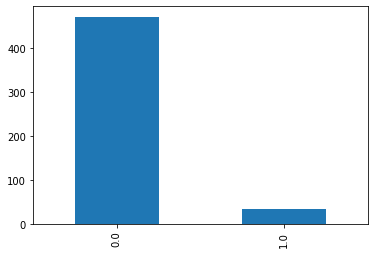

In [70]:
%matplotlib inline
df['CHAS'].value_counts().plot(kind='bar')

Note that the IPython magic command `%matplotlib inline` enables you to view the chart inline.

Let's pull back to the dataset as a whole for a moment. Two major things that you will look for in almost any dataset are trends and relationships. A typical relationship between variables to explore is the Pearson correlation, or the extent to which two variables are linearly related. The `corr` method will show this in table format for all of the columns in a `DataFrame`:

In [71]:
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_50
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,0.452220,-0.385832,0.254574
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,-0.590769
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,0.516001
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.088659
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,0.597644
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,-0.164465
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,0.870348
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,-0.673813
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,0.361191
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,0.381395


Suppose you just wanted to look at the correlations between all of the columns and just one variable? Let's examine just the correlation between all other variables and the percentage of owner-occupied houses build before 1940 (AGE). We will do this by accessing the column by index number:

In [ ]:
corr = df.corr(method='pearson')
corr_with_homevalue = corr.iloc[-1]
corr_with_homevalue[corr_with_homevalue.argsort()[::-1]]

With the correlations arranged in descending order, it's easy to start to see some patterns. Correlating AGE with a variable we created from AGE is a trivial correlation. However, it is interesting to note that the percentage of older housing stock in communities strongly correlates with air pollution (NOX) and the proportion of non-retail business acres per town (INDUS); at least in 1978 metro Boston, older towns are more industrial.

Graphically, we can see the correlations using a heatmap from the Seaborn library:

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))

Histograms are another valuable tool for investigating your data. For example, what is the overall distribution of prices of owner-occupied houses in the Boston area?

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['MEDV'])

The default bin size for the matplotlib histogram (essentially big of buckets of percentages that you include in each histogram bar in this case) is pretty large and might mask smaller details. To get a finer-grained view of the AGE column, you can manually increase the number of bins in the histogram:

In [ ]:
plt.hist(df['MEDV'],bins=50)

Seaborn has a somewhat more attractive version of the standard matplotlib histogram: the distribution plot. This is a combination histogram and kernel density estimate (KDE) plot (essentially a smoothed histogram):

In [ ]:
sns.distplot(df['MEDV'])

Another commonly used plot is the Seaborn jointplot, which combines histograms for two columns along with a scatterplot:

In [ ]:
sns.jointplot(df['RM'], df['MEDV'], kind='scatter')

Unfortunately, many of the dots print over each other. You can help address this by adding some alpha blending, a figure that sets the transparency for the dots so that concentrations of them drawing over one another will be apparent:

In [ ]:
sns.jointplot(df['RM'], df['MEDV'], kind='scatter', alpha=0.3)

Another way to see patterns in your data is with a two-dimensional KDE plot. Darker colors here represent a higher concentration of data points:

In [ ]:
sns.kdeplot(df['RM'], df['MEDV'], shade=True)

Note that while the KDE plot is very good at showing concentrations of data points, finer structures like linear relationships (such as the clear relationship between the number of rooms in homes and the house price) are lost in the KDE plot.

Finally, the pairplot in Seaborn allows you to see scatterplots and histograms for several columns in one table. Here we have played with some of the keywords to produce a more sophisticated and easier to read pairplot that incorporates both alpha blending and linear regression lines for the scatterplots.

In [ ]:
sns.pairplot(df[['RM', 'AGE', 'LSTAT', 'DIS', 'MEDV']], kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

Visualization is the start of the really cool, fun part of data science. So play around with these visualization tools and see what you can learn from the data!

> **Takeaway:** An old joke goes: “What does a data scientist seen when they look at a dataset? A bunch of numbers.” There is more than a little truth in that joke. Visualization is often the key to finding patterns and correlations in your data. While visualization cannot often deliver precise results, it can point you in the right direction to ask better questions and efficiently find value in the data.